In [1]:
import pandas as pd
import numpy as np
from IPython.display import display

# 调换训练集和验证集
data_train = pd.read_csv("Deviation_co.csv", header=0)
data_test = pd.read_csv("Evaluation_co.csv", header=0)
data_validation = pd.read_csv("Validation_co.csv", header=0)
data_test.head(3)

,Unnamed: 0,DPM1,C1orf112,FGR,FUCA2,NIPAL3,LAS1L,ANKIB1,KRIT1,BAD,...,ENSG00000270055,ENSG00000271043,ENSG00000272053,ENSG00000272168,ENSG00000272369,ENSG00000272888,type,Stage,Gender,age
0,Vumc-GBM-475-TR1362,2.042600,3.335600,4.296881,4.538599,5.884916,1.218640,4.575222,4.538599,4.982147,...,4.868702,7.228032,9.589012,5.969893,4.679824,5.208840,Glioma,NaN,M,79.0
1,Vumc-GBM-550t0-TR1519,2.983188,3.628931,4.687254,4.335098,6.182609,2.983188,5.249428,4.335098,5.483351,...,4.253036,7.407085,8.642508,6.499717,5.116511,5.162191,Glioma,NaN,M,34.0
2,Maas-GBM-M00004-TR2113,6.287489,3.336306,1.218640,5.555245,1.218640,1.218640,4.159713,1.218640,3.805973,...,4.976162,7.301816,9.844749,5.669815,5.221307,4.159713,Glioma,NaN,F,63.0


In [2]:
# 特征名称
feature_total = data_train.columns[1:].tolist()
feature_total = feature_total[:-4]
len(feature_total)
# 结局
# outcome_variable = 'group'
print(len(feature_total))

5440


In [3]:
feature_train = data_train[feature_total]
feature_test = data_test[feature_total]
feature_validation = data_validation[feature_total]

# target_train = data_train['group']
# target_test = data_test['group']

In [4]:
X_train = np.array(feature_train)
X_test = np.array(feature_test)
X_validation = np.array(feature_validation)

# y_train = np.array(target_train)
# y_test = np.array(target_test)

In [5]:
import numpy as np
from scipy.stats import sem
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

def Confidence_Interval(y_pred, y_true):
    print("Original ROC area: {:0.2f}".format(roc_auc_score(y_true, y_pred)))

    n_bootstraps = 1000
    rng_seed = 42  # control reproducibility
    bootstrapped_scores = []

    rng = np.random.RandomState(rng_seed)
    for i in range(n_bootstraps):
        # bootstrap by sampling with replacement on the prediction indices
        indices = rng.random_integers(0, len(y_pred) - 1, len(y_pred))
        if len(np.unique(y_true[indices])) < 2:
            # We need at least one positive and one negative sample for ROC AUC
            # to be defined: reject the sample
            continue

        score = roc_auc_score(y_true[indices], y_pred[indices])
        bootstrapped_scores.append(score)
        print("Bootstrap #{} ROC area: {:0.2f}".format(i + 1, score))

    # 绘制柱状图
    plt.hist(bootstrapped_scores, bins=50)
    plt.title('Histogram of the bootstrapped ROC AUC scores')
    plt.show()

    sorted_scores = np.array(bootstrapped_scores)
    sorted_scores.sort()

    # Computing the lower and upper bound of the 90% confidence interval
    # You can change the bounds percentiles to 0.025 and 0.975 to get
    # a 95% confidence interval instead.
    confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
    confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
    print("Confidence interval for the score: [{:0.2f} - {:0.2}]".format(
        confidence_lower, confidence_upper))
    confidence_lower, confidence_upper = format(confidence_lower, '.2f'), format(confidence_upper, '.2f')
    confidence_interval = '(' + str(confidence_lower) + '-' + str(format(confidence_upper)) + ')'

    return confidence_interval

# confidence_interval_test_RF = Confidence_Interval(model_RF.predict_proba(X_test)[:,1], y_test_np)

In [6]:
from sk_matrix import sk_matrix

### Calinski-Harbasz Score (CH指标)

### Davies Bouldin Score（DB指标）

In [13]:
%%time
from sklearn.mixture import GaussianMixture
import sklearn.metrics as metrics

num_cluster = []
CH_list = []
DB_list = []

for i in range(2, 16):
    n_components = i
    model_GMM = GaussianMixture(n_components=n_components, covariance_type='full', random_state=123)
    model_GMM.fit(X_train)
    y_pred = model_GMM.predict(X_train)
    # labels = model_GMM.labels_
    CH_score = metrics.calinski_harabasz_score(X_train, y_pred)
    DB_score = metrics.davies_bouldin_score(X_train, y_pred)

    num_cluster.append(i)
    CH_list.append(CH_score)
    DB_list.append(DB_score)

print(CH_list)
print(DB_list)

C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_

[169.14644896785177, 105.97224740111663, 94.01106559418055, 79.596164492628, 66.21338019023233, 58.70763437448893, 50.1681601208553, 46.08221195420881, 42.54218300689348, 39.495173410702414, 36.40555406338281, 33.88114773445653, 31.616609525233958, 29.65570472396079]
[1.8544979396403727, 2.6313012248551293, 2.6792541234858342, 2.5797937481026088, 2.9828479064477267, 3.017920051246442, 3.053197626110788, 3.031491398653069, 3.066449498449927, 3.1649952408120114, 2.9638022710718723, 3.1087817889973683, 3.139958941886388, 3.2278391521070064]
Wall time: 32min 26s


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


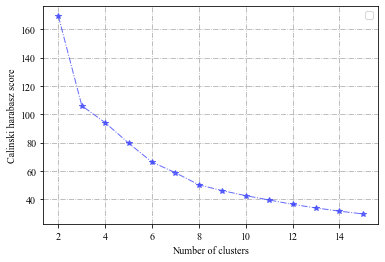

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


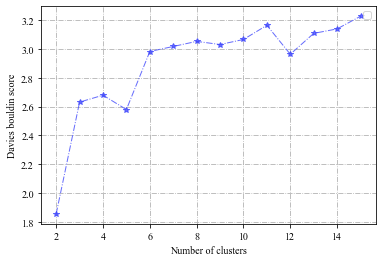

In [45]:
# 折线图
with PdfPages('CH-DB_Deviation.pdf') as pdf:
    fig = plt.figure()
    plt.plot(num_cluster, CH_list, '*-.', color='#4048fc', alpha=0.8, linewidth=1)
    plt.xlabel('Number of clusters')
    plt.ylabel('Calinski harabasz score')
    plt.legend(loc=0)
    plt.grid(True, linestyle='-.')
    pdf.savefig(fig)
    plt.show() # 选大
    plt.close()
    
    fig = plt.figure()
    plt.plot(num_cluster, DB_list, '*-.', color='#4048fc', alpha=0.8, linewidth=1)
    plt.xlabel('Number of clusters')
    plt.ylabel('Davies bouldin score')
    plt.legend(loc=0)
    plt.grid(True, linestyle='-.')
    pdf.savefig(fig)
    plt.show() # 选小
    plt.close()

In [7]:
from sklearn.mixture import GaussianMixture
import sklearn.metrics as metrics

n_components = 3 # train为5,evaluation为4
model_GMM = GaussianMixture(n_components=n_components, covariance_type='full', random_state=123)
model_GMM.fit(X_train)
y_pred = model_GMM.predict(X_train)
np.set_printoptions(threshold=np.inf)
print(y_pred)

# 聚类数据集
X_train_GMM = np.hstack([X_train, y_pred.reshape(-1, 1)])
X_train_GMM = pd.DataFrame(X_train_GMM, columns=np.array(feature_total + ['clusters'])) # np.append(feature_importance_XGB_first[:50,0]

C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


[1 0 0 2 0 0 0 2 2 2 1 1 1 1 0 2 2 2 0 2 0 2 2 2 2 1 1 1 1 1 1 1 1 1 1 2 2
 2 0 0 2 2 0 2 0 2 1 2 0 2 0 1 2 2 0 2 1 2 2 0 1 2 0 2 2 2 2 2 1 1 1 2 2 1
 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 0 0 0 2 0 1 0 0 2 0 2 1 2 1 2 0 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 0 0 0 2 2 0 2 2 2 2 2 2 1 2 2 2 2 0 0
 2 0 0 1 0 1 2 2 2 1 2 2 2 2 2 2 0 2 1 1 1 0 2 2 1 2 2 2 1 2 1 2 2 2 2 1 1
 2 1 0 2 2 1 0 1 0 2 1 0 0 0 0 1 0 2 2 2 0 1 2 2 1 2 1 2 2 0 2 1 1 1 1 0 0
 1 1 1 2 1 1 1 0 1 1 2 1 0 0 1 0 2 1 0 2 2 0 2 0 2 2 2 2 2 1 2 0 2 2 2 1 1
 1 0 2 0 2 2 2 0 2 1 2 1 2 1 1 1 1 1 1 0 2 1 2 2 2 2 2 2 0 2 0 0 2 2 2 2 2
 2 2 0 0 0 1 0 2 0 2 2 2 2 2 2 0 2 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 0 0 0 0
 0 0 0 2 1 1 1 1 1 1 0 0 0 2 0 1 2 1 1 1 1 1 1 1 1 0 2 0 0 1 1 1 1 1 0 1 1
 0 2 1 1 1 1 0 1 1 1 1 0 0 2 2 2 2 2 0 2 2 2 2 2 0 2 0 0 1 1 0 1 0 0 0 0 1
 1 2 1 2 0 0 2 2 1 1 1 1 1 1 1 0 1 1 1 1 2 2 2 1 1 1 1 0 0 1 1 0 1 1 1 0 1
 1 0 1 1 2 0 1 1 0 1 1 1 

In [8]:
# 输出聚类数据
data_output = pd.concat([data_train, pd.DataFrame(y_pred.reshape(-1,1))], axis=1)
data_output.to_csv('output_train(5440特征GMM分类).csv')

# second XGB

两两建模

In [9]:
%%time
import itertools as it
from sklearn.utils import shuffle 
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

auc_sublist = []
auc_sub_CVlist = []
combination_list = []
feature_importance_sublist = []

# 排列组合
for e in it.combinations(range(n_components), 2):
    X_0 = X_train_GMM[X_train_GMM['clusters'] == e[0]]
    X_1 = X_train_GMM[X_train_GMM['clusters'] == e[1]]
    
    sub_new = np.vstack([np.array(X_0), np.array(X_1)]) # 拼接
    sub_new = shuffle(sub_new, random_state=2888) # 打乱
    # X, y划分
    X_sub = sub_new[:, :-1]
    y_sub = sub_new[:, -1]
    
    # 训练模型
    model_sub = XGBClassifier(n_estimators=30, max_depth=1, subsample=0.9, 
                          colsample_bytree=1, reg_alpha= 0.1, 
                          objective= 'binary:logistic', nthread=8,
                        scale_pos_weight=1, seed=123)
    model_sub.fit(X_sub, y_sub)
    
    auc_sub = metrics.roc_auc_score(y_sub, model_sub.predict_proba(X_sub)[:,1])
    auc_sub_CV = cross_val_score(model_sub, X_sub, y_sub, cv=10, scoring='roc_auc')
    auc_sub_CV = auc_sub_CV.mean()
    
    '''特征重要性'''
    X_columns = feature_total

    importance_XGB = model_sub.feature_importances_

    # X_columns = data_train.columns.values.tolist()
    #np.argsort()返回待排序集合从下到大的索引值，[::-1]实现倒序，即最终imp_result内保存的是从大到小的索引值
    imp_result = np.argsort(importance_XGB)[::-1][:]

    #按重要性从高到低输出属性列名和其重要性
    for i in range(len(imp_result)):
        print("%2d. %-*s %f" % (i + 1, 30, X_columns[imp_result[i]], importance_XGB[imp_result[i]]))

    #对属性列，按属性重要性从高到低进行排序
    X_columns_XGB = [X_columns[i] for i in imp_result]

    col_name = []
    imp_num = []
    for i in range(len(imp_result)):
        col_name.append(X_columns[imp_result[i]])
        imp_num.append(importance_XGB[imp_result[i]])
    col_name = np.array(col_name)
    col_name = col_name[:,np.newaxis]
    imp_num = np.array(imp_num)
    imp_num = imp_num[:,np.newaxis]
    feature_importance_sub = np.hstack([col_name, imp_num])
    ''''''
    
    auc_sublist.append(auc_sub)
    auc_sub_CVlist.append(auc_sub_CV)
    combination_list.append(e)
    feature_importance_sublist.append(feature_importance_sub) 

D:\Program Files (x86)\Anaconda3.8\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:43:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda3.8\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:43:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda3.8\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:44:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda3.8\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:44:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda3.8\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:44:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda3.8\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:44:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda3.8\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:44:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda3.8\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:44:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda3.8\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:44:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda3.8\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:44:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda3.8\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:08:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 1. PTPRC                          0.311300
 2. HSP90B1                        0.236240
 3. ARHGAP9                        0.121671
 4. SEPTIN7                        0.088836
 5. SORL1                          0.050483
 6. RNF149                         0.038936
 7. MCUR1                          0.035011
 8. RBM10                          0.025086
 9. TRAF3IP3                       0.017126
10. DOCK8                          0.012099
11. TRAPPC1                        0.012003
12. NLRP1                          0.011102
13. MTURN                          0.007414
14. SNRNP70                        0.006288
15. ITGB2                          0.005236
16. ADGRE5                    

2408. NUDC                           0.000000
2409. ERP29                          0.000000
2410. BRAP                           0.000000
2411. PEBP1                          0.000000
2412. PXN                            0.000000
2413. CRLS1                          0.000000
2414. SMOX                           0.000000
2415. FKBP1A                         0.000000
2416. NSFL1C                         0.000000
2417. MAVS                           0.000000
2418. XRN2                           0.000000
2419. DYNLL1                         0.000000
2420. TESC                           0.000000
2421. SNX5                           0.000000
2422. RPL6                           0.000000
2423. MAPKAPK5                       0.000000
2424. ANAPC5                         0.000000
2425. SLC8B1                         0.000000
2426. TMEM230                        0.000000
2427. OAS1                           0.000000
2428. GCN1                           0.000000
2429. RPLP0                       

4908. LZIC                           0.000000
4909. DHRS3                          0.000000
4910. LAPTM5                         0.000000
4911. LARP4                          0.000000
4912. ALDH16A1                       0.000000
4913. FCRL3                          0.000000
4914. ENSG00000161570                0.000000
4915. HK3                            0.000000
4916. LY6E                           0.000000
4917. VPS28                          0.000000
4918. ORAI2                          0.000000
4919. SH2B2                          0.000000
4920. SQSTM1                         0.000000
4921. MGAT4B                         0.000000
4922. RPL8                           0.000000
4923. PSMC2                          0.000000
4924. MFSD12                         0.000000
4925. DVL3                           0.000000
4926. AP2M1                          0.000000
4927. ABCF3                          0.000000
4928. SAP30BP                        0.000000
4929. ACOX1                       

D:\Program Files (x86)\Anaconda3.8\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:08:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda3.8\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:08:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda3.8\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:08:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda3.8\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:08:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda3.8\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:39:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda3.8\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:39:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda3.8\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:39:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda3.8\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:39:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda3.8\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:39:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda3.8\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:39:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda3.8\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:39:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 1. CYTH4                          0.158325
 2. PXN                            0.121149
 3. MTMR6                          0.101119
 4. RUNX3                          0.071886
 5. MAP3K3                         0.057154
 6. PPP4R3A                        0.047526
 7. WWP2                           0.045479
 8. CYTIP                          0.038621
 9. RAPGEF1                        0.038448
10. PMPCA                          0.037687
11. ELMO2                          0.029259
12. USP5                           0.029162
13. KDM4C                          0.023771
14. DDX5                           0.023627
15. CHFR                           0.020607
16. PLCG2                     

2939. ABAT                           0.000000
2940. UPP1                           0.000000
2941. TBK1                           0.000000
2942. TBL3                           0.000000
2943. UTY                            0.000000
2944. PRKX                           0.000000
2945. SMTN                           0.000000
2946. PTP4A2                         0.000000
2947. ACTG1                          0.000000
2948. DENND5A                        0.000000
2949. UQCR10                         0.000000
2950. NIPSNAP1                       0.000000
2951. CRELD2                         0.000000
2952. SCFD2                          0.000000
2953. PPP1R2                         0.000000
2954. TSPYL2                         0.000000
2955. IRAK1                          0.000000
2956. ENSG00000184319                0.000000
2957. COPB2                          0.000000
2958. TMEM50A                        0.000000
2959. EFHC2                          0.000000
2960. CEP57L1                     

D:\Program Files (x86)\Anaconda3.8\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:39:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda3.8\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:39:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda3.8\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:39:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda3.8\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:39:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda3.8\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:39:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda3.8\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:39:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda3.8\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:39:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda3.8\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:39:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda3.8\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:39:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda3.8\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:39:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda3.8\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:39:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 1. ADIPOR1                        0.413377
 2. MTURN                          0.129579
 3. FAXDC2                         0.084318
 4. WDR1                           0.062139
 5. YWHAZ                          0.049516
 6. PGRMC1                         0.044523
 7. BIN2                           0.041545
 8. YWHAE                          0.037401
 9. EIF3A                          0.027626
10. PRKAR2B                        0.023435
11. SEC14L1                        0.018070
12. UXS1                           0.015835
13. TSPOAP1-AS1                    0.010241
14. SYTL1                          0.008386
15. RAB4A                          0.007591
16. TAF1D                     

1896. AKR7A2                         0.000000
1897. AP5M1                          0.000000
1898. ANAPC4                         0.000000
1899. TRAPPC3                        0.000000
1900. ARID1B                         0.000000
1901. RFC2                           0.000000
1902. LTBP1                          0.000000
1903. VAMP3                          0.000000
1904. ARAP2                          0.000000
1905. TPR                            0.000000
1906. DTNBP1                         0.000000
1907. XK                             0.000000
1908. ANO2                           0.000000
1909. WWC3                           0.000000
1910. ARHGAP6                        0.000000
1911. MAP4                           0.000000
1912. USP28                          0.000000
1913. HDAC9                          0.000000
1914. SNX29                          0.000000
1915. MRPS10                         0.000000
1916. RSF1                           0.000000
1917. VPS13D                      

2763. MED16                          0.000000
2764. ATG13                          0.000000
2765. CATSPER1                       0.000000
2766. PHYKPL                         0.000000
2767. LSM1                           0.000000
2768. CTDNEP1                        0.000000
2769. SWI5                           0.000000
2770. UBE2O                          0.000000
2771. SEC24C                         0.000000
2772. ACER2                          0.000000
2773. ANO6                           0.000000
2774. TALDO1                         0.000000
2775. RPS6KA3                        0.000000
2776. CHD9                           0.000000
2777. MAN1B1                         0.000000
2778. BEND2                          0.000000
2779. OVOS2                          0.000000
2780. TIMM22                         0.000000
2781. ZFAS1                          0.000000
2782. CD19                           0.000000
2783. ARIH2                          0.000000
2784. ATOX1                       

5179. RMND5A                         0.000000
5180. RPIA                           0.000000
5181. CFDP1                          0.000000
5182. ZDHHC7                         0.000000
5183. CMIP                           0.000000
5184. TRIP12                         0.000000
5185. SREK1                          0.000000
5186. NBAS                           0.000000
5187. AMN1                           0.000000
5188. SPON2                          0.000000
5189. VPS51                          0.000000
5190. EML3                           0.000000
5191. ENSG00000149531                0.000000
5192. EI24                           0.000000
5193. ESAM                           0.000000
5194. SIDT2                          0.000000
5195. COMMD7                         0.000000
5196. FERMT3                         0.000000
5197. FAU                            0.000000
5198. PPP4C                          0.000000
5199. ACSL1                          0.000000
5200. ALDOA                       

重新整理特征重要性

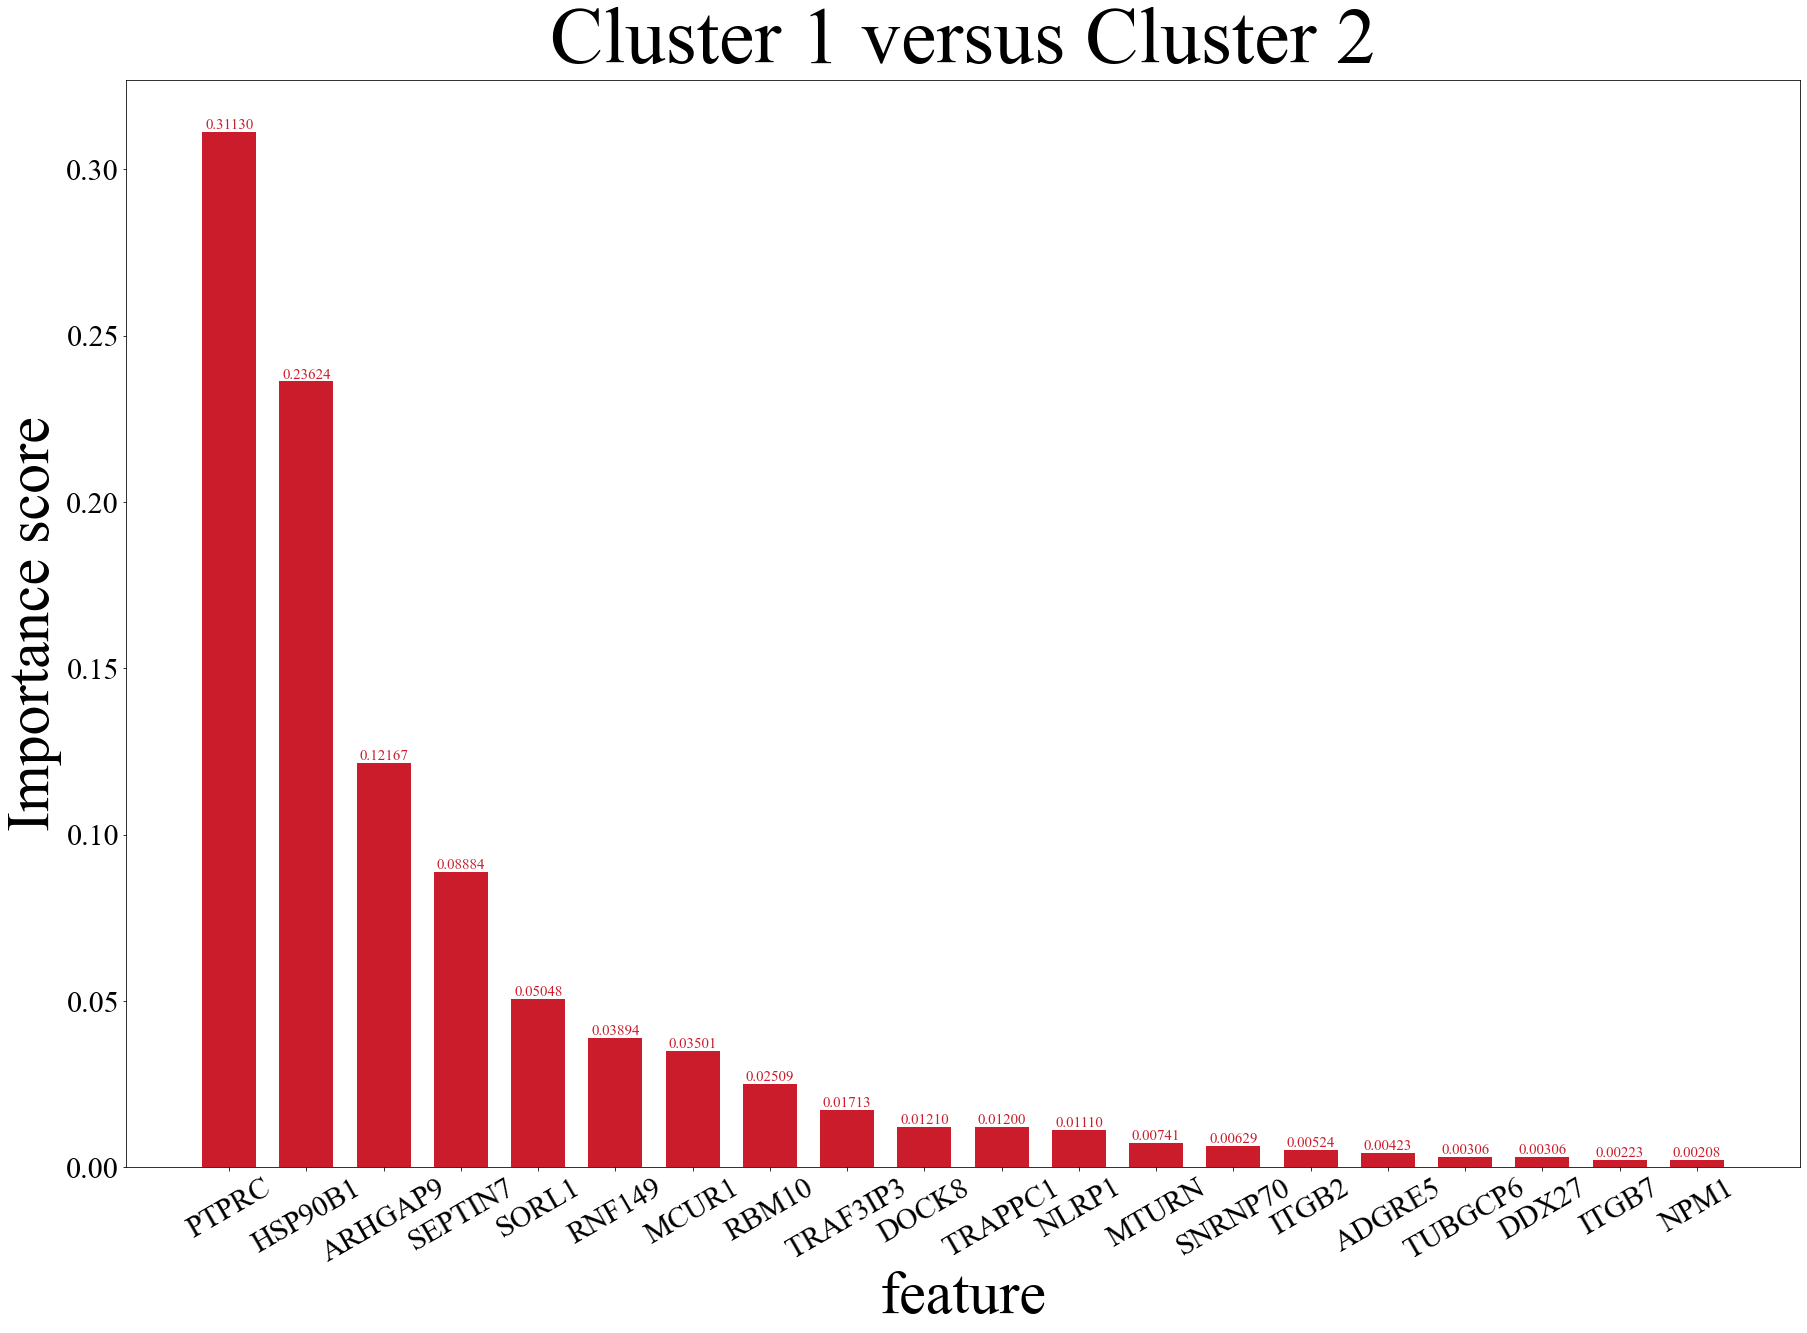

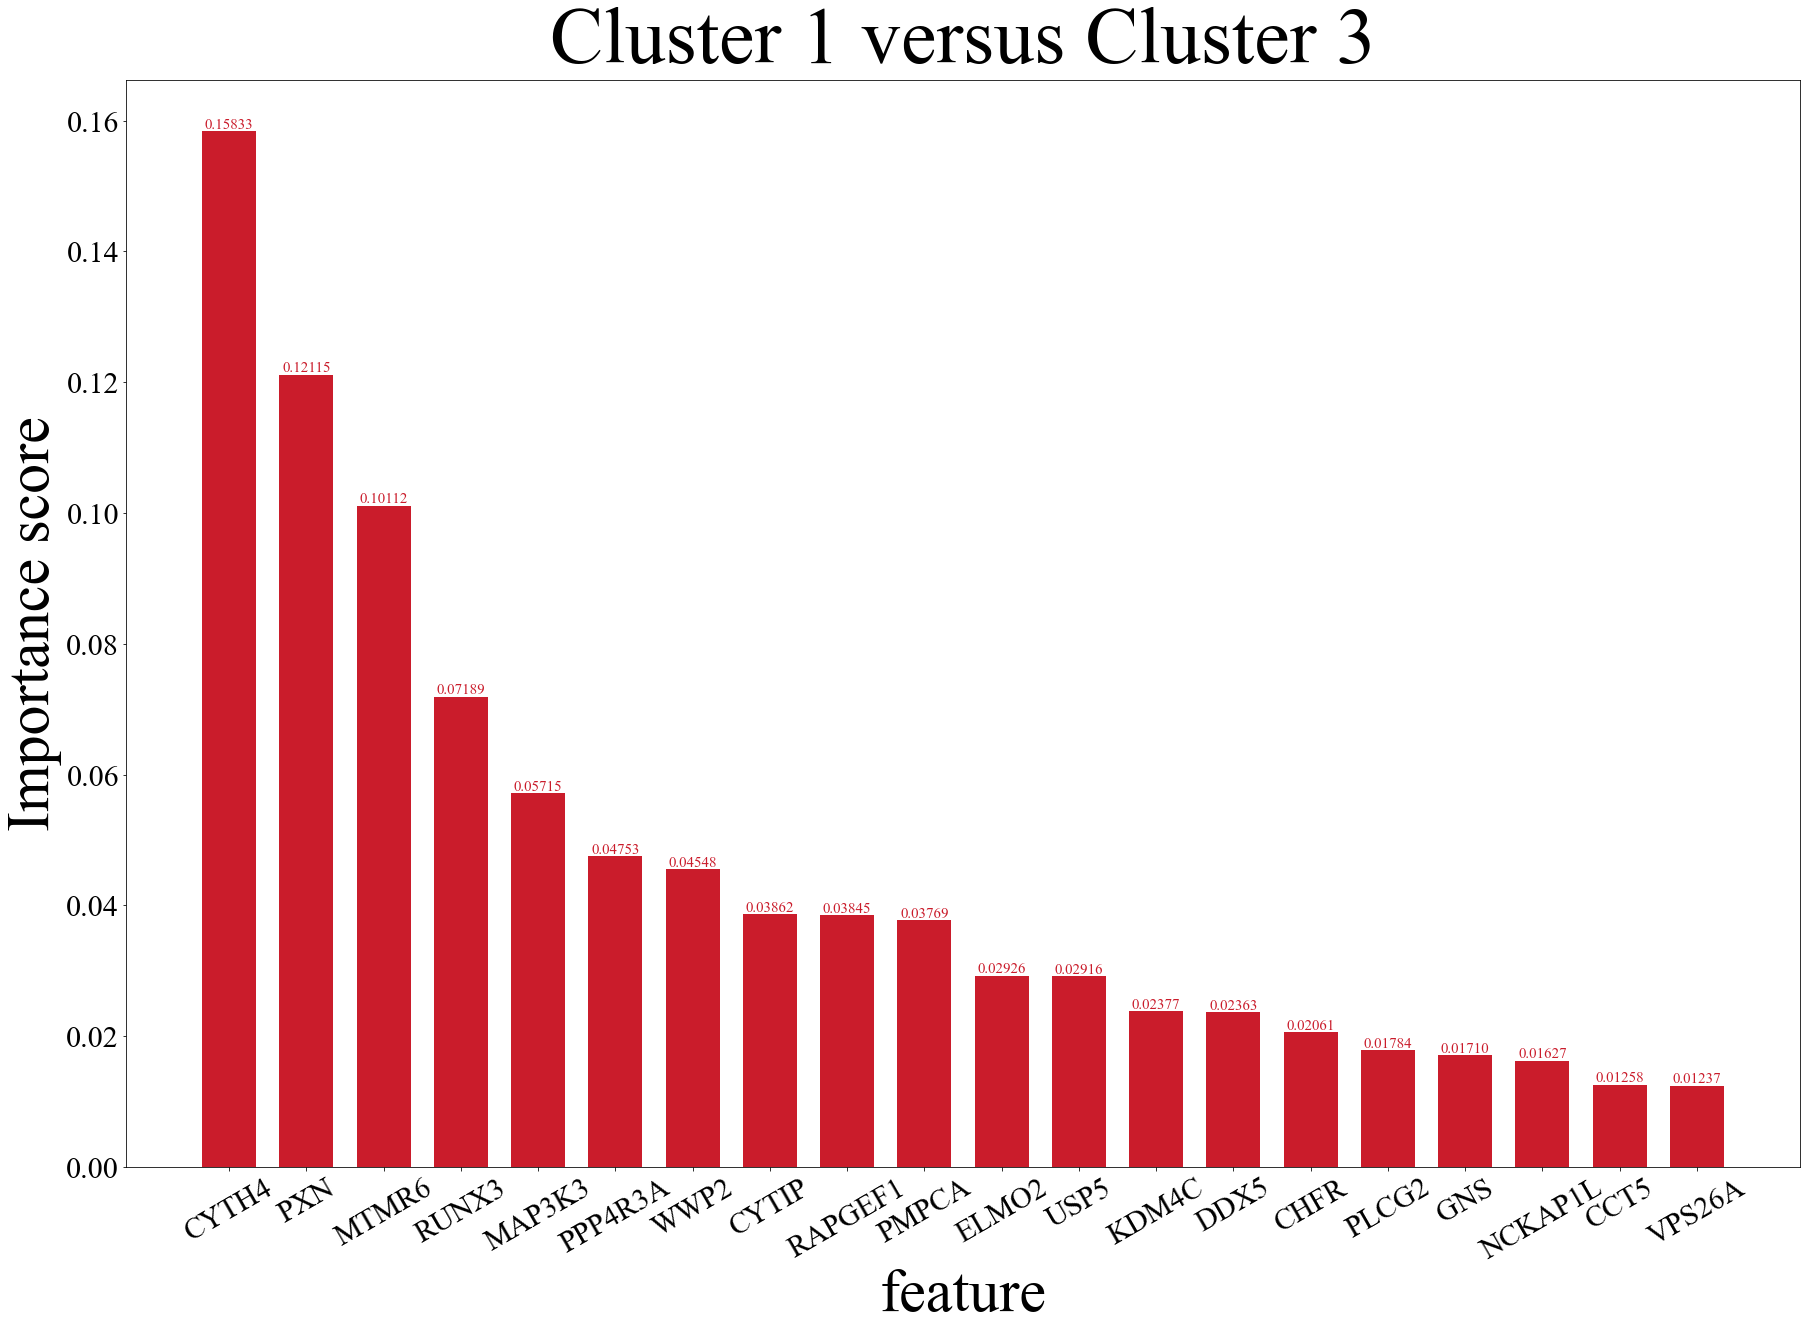

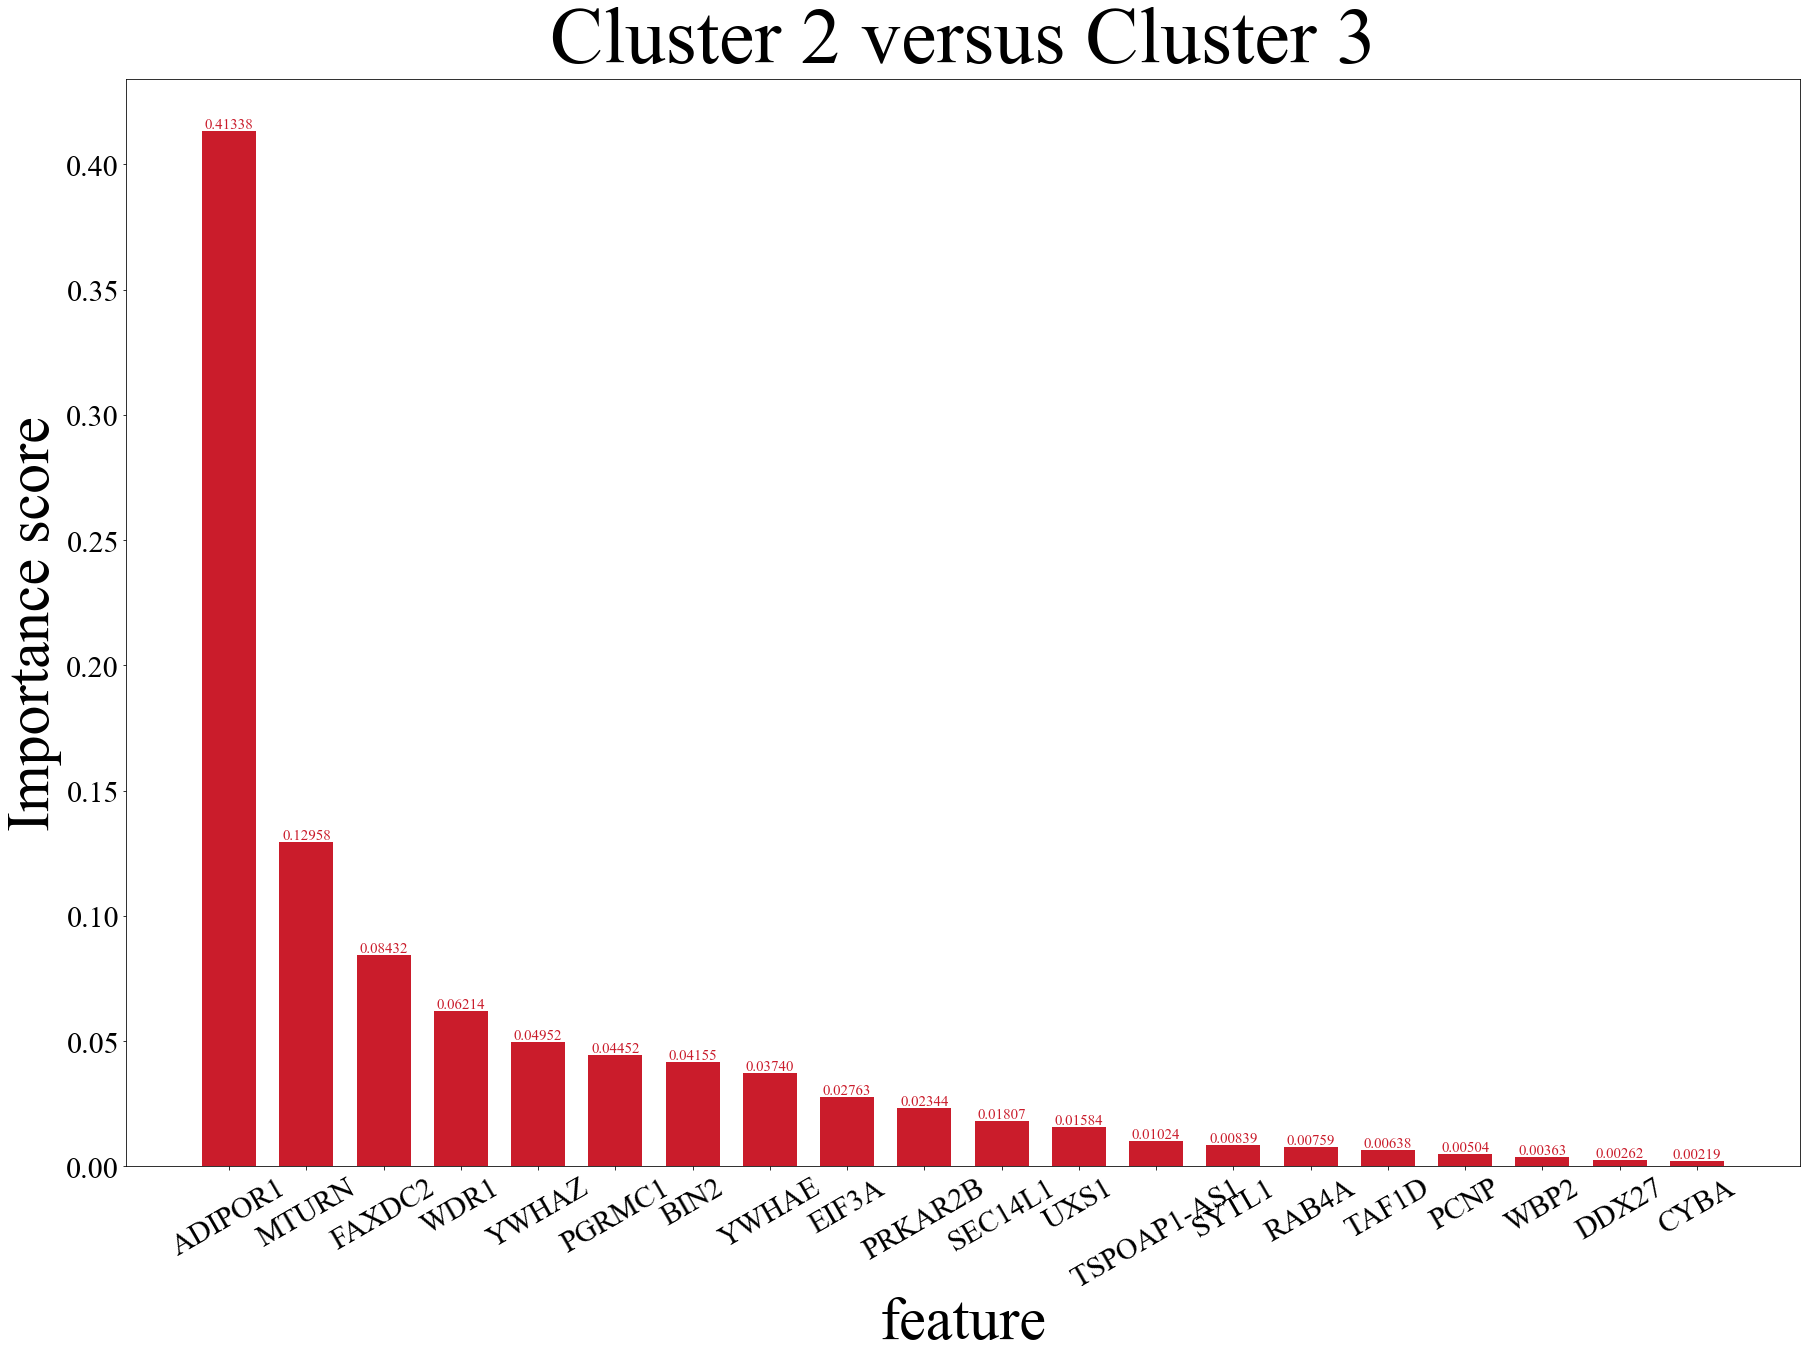

In [20]:
from matplotlib.backends.backend_pdf import PdfPages

with PdfPages('GMM分组柱状图.pdf') as pdf:
    for i in range(len(auc_sub_CVlist)):
        # 循环创建变量
        # locals()['pair_'+str(i)] = combination_list[i]
        # locals()['feature_importance_sub_'+str(i)] = feature_importance_sublist[i]
        if i==0:
            feature_importance_list = feature_importance_sublist[i]
        if i>0:
            feature_importance_list = np.hstack([feature_importance_list, feature_importance_sublist[i]])

        '''绘制柱状图'''
        fontsize=40
        fig = plt.figure(figsize=(30, 20))
        plt.rc('font', family='Times New Roman') #修体
        plt.tick_params(labelsize=fontsize)
        plt.bar(feature_importance_sublist[i][:20,0], feature_importance_sublist[i][:20,1].astype('float64'), 0.7, color="#ca1c2b")
        for a,b in zip(feature_importance_sublist[i][:20,0], feature_importance_sublist[i][:20,1].astype('float64')):   #柱子上的数字显示
            plt.text(a,b,'%.5f'%b,ha='center',va='bottom',fontsize=fontsize-25, color='#ca1c2b')
        plt.tick_params(labelsize=fontsize-10) # 设置刻度字体大小
        plt.xticks(rotation=30) # X轴刻度旋转
        plt.xlabel("feature", fontsize=fontsize+20)
        plt.ylabel("Importance score", fontsize=fontsize+20)
        tit = "Cluster " + str(combination_list[i][0]+1) + " versus Cluster " + str(combination_list[i][1]+1)
        plt.title(tit, fontsize=fontsize+40)
        pdf.savefig(fig)
        plt.show()
        plt.close()
        '''按排名排序：还木有解决办法'''

In [10]:
# 加权
union_list = []
select_num = 5440 # 0.05，
for i in range(len(auc_sub_CVlist)):
    locals()['featurelist_'+str(i)] = []
    for j in range(select_num):
        name = feature_importance_sublist[i][:,0][j]
        score = float(feature_importance_sublist[i][:,1][j])
        if score > 0.0237:  # 0.07→32，0.075→30，0.045→31
            locals()['featurelist_'+str(i)].append(name)
    union_list = list(set(union_list).union(locals()['featurelist_'+str(i)]))
print(len(union_list))
print(union_list)

30
['MAP3K3', 'YWHAZ', 'PGRMC1', 'CYTIP', 'ELMO2', 'KDM4C', 'HSP90B1', 'MTURN', 'YWHAE', 'USP5', 'RUNX3', 'BIN2', 'EIF3A', 'ADIPOR1', 'MCUR1', 'RBM10', 'CYTH4', 'PXN', 'PTPRC', 'SEPTIN7', 'WWP2', 'RNF149', 'PMPCA', 'PPP4R3A', 'WDR1', 'MTMR6', 'ARHGAP9', 'RAPGEF1', 'SORL1', 'FAXDC2']


# third XGB

In [11]:
X_train_pd = pd.DataFrame(X_train, columns=np.array(feature_total))
X_test_pd = pd.DataFrame(X_test, columns=np.array(feature_total))
X_validation_pd = pd.DataFrame(X_validation, columns=np.array(feature_total))

In [12]:
X_train_3 = X_train_pd[union_list]
X_test_3 = X_test_pd[union_list]
X_validation_3 = X_validation_pd[union_list]
y_train_3 = y_pred
# X_train_3, y_train_3 = shuffle(X_train_3, y_train_3, random_state=123)

X_train_3_np = np.array(X_train_3)
y_train_3_np = np.array(y_train_3)
X_test_3_np = np.array(X_test_3)
X_validation_3_np = np.array(X_validation_3)

多分类XGB

In [14]:
import xgboost as xgb

xg_train = xgb.DMatrix(X_train_3_np, label=y_train_3_np) 
# 准备参数
param = {}
param['objective'] = 'multi:softprob'  
param['num_class'] = n_components 
param['eta'] = 0.1
param['max_depth'] = n_components
param['silent'] = 1
param['nthread'] = 4
num_round = n_components

model_XGB = xgb.train(param, # 参数
                xg_train,  # 训练数据
                num_round)# 弱学习器的个数

y_prob = model_XGB.predict(xg_train).reshape(y_train_3_np.shape[0], n_components) # 给出属于每个类别的概率
y_label = np.argmax(y_prob, axis=1) #从预测的6组中选择最大的概率进行输出

# 独热编码
from sklearn import preprocessing  

array = np.reshape(y_train_3_np, (-1, 1))
enc = preprocessing.OneHotEncoder()  
enc.fit([[0],[1],[2]]) 
array = enc.transform(array).toarray()

[10:17:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:17:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<ipython-input-40-7ae95087376a>:26: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-40-7ae95087376a>:54: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', lw=lw-0.5, color='#C4C4C4')


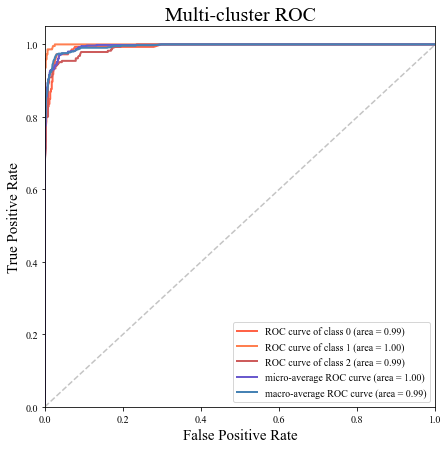

In [40]:
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from scipy import interp

with PdfPages('ROC_第三个XGB.pdf') as pdf:
    n_classes = n_components

    # 计算每一类的ROC
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(array[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # micro（方法二）
    fpr["micro"], tpr["micro"], _ = roc_curve(array.ravel(), y_prob.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # macro（方法一）
    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])
    # Finally average it and compute AUC
    mean_tpr /= n_classes
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    lw=2
    fig = plt.figure(figsize=(7,7))
    plt.rc('font',family='Times New Roman') # 修改字体

    colors = cycle(['#FF6347', '#FF7F50', '#CD5C5C'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))
    
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='#6A5ACD', linewidth=2)

    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='#4682B4', linewidth=2)

    plt.plot([0, 1], [0, 1], 'k--', lw=lw-0.5, color='#C4C4C4')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=15)
    plt.ylabel('True Positive Rate', fontsize=15)
    plt.title('Multi-cluster ROC', fontsize=20)
    plt.legend(loc="lower right")
    pdf.savefig(fig)
    plt.show()

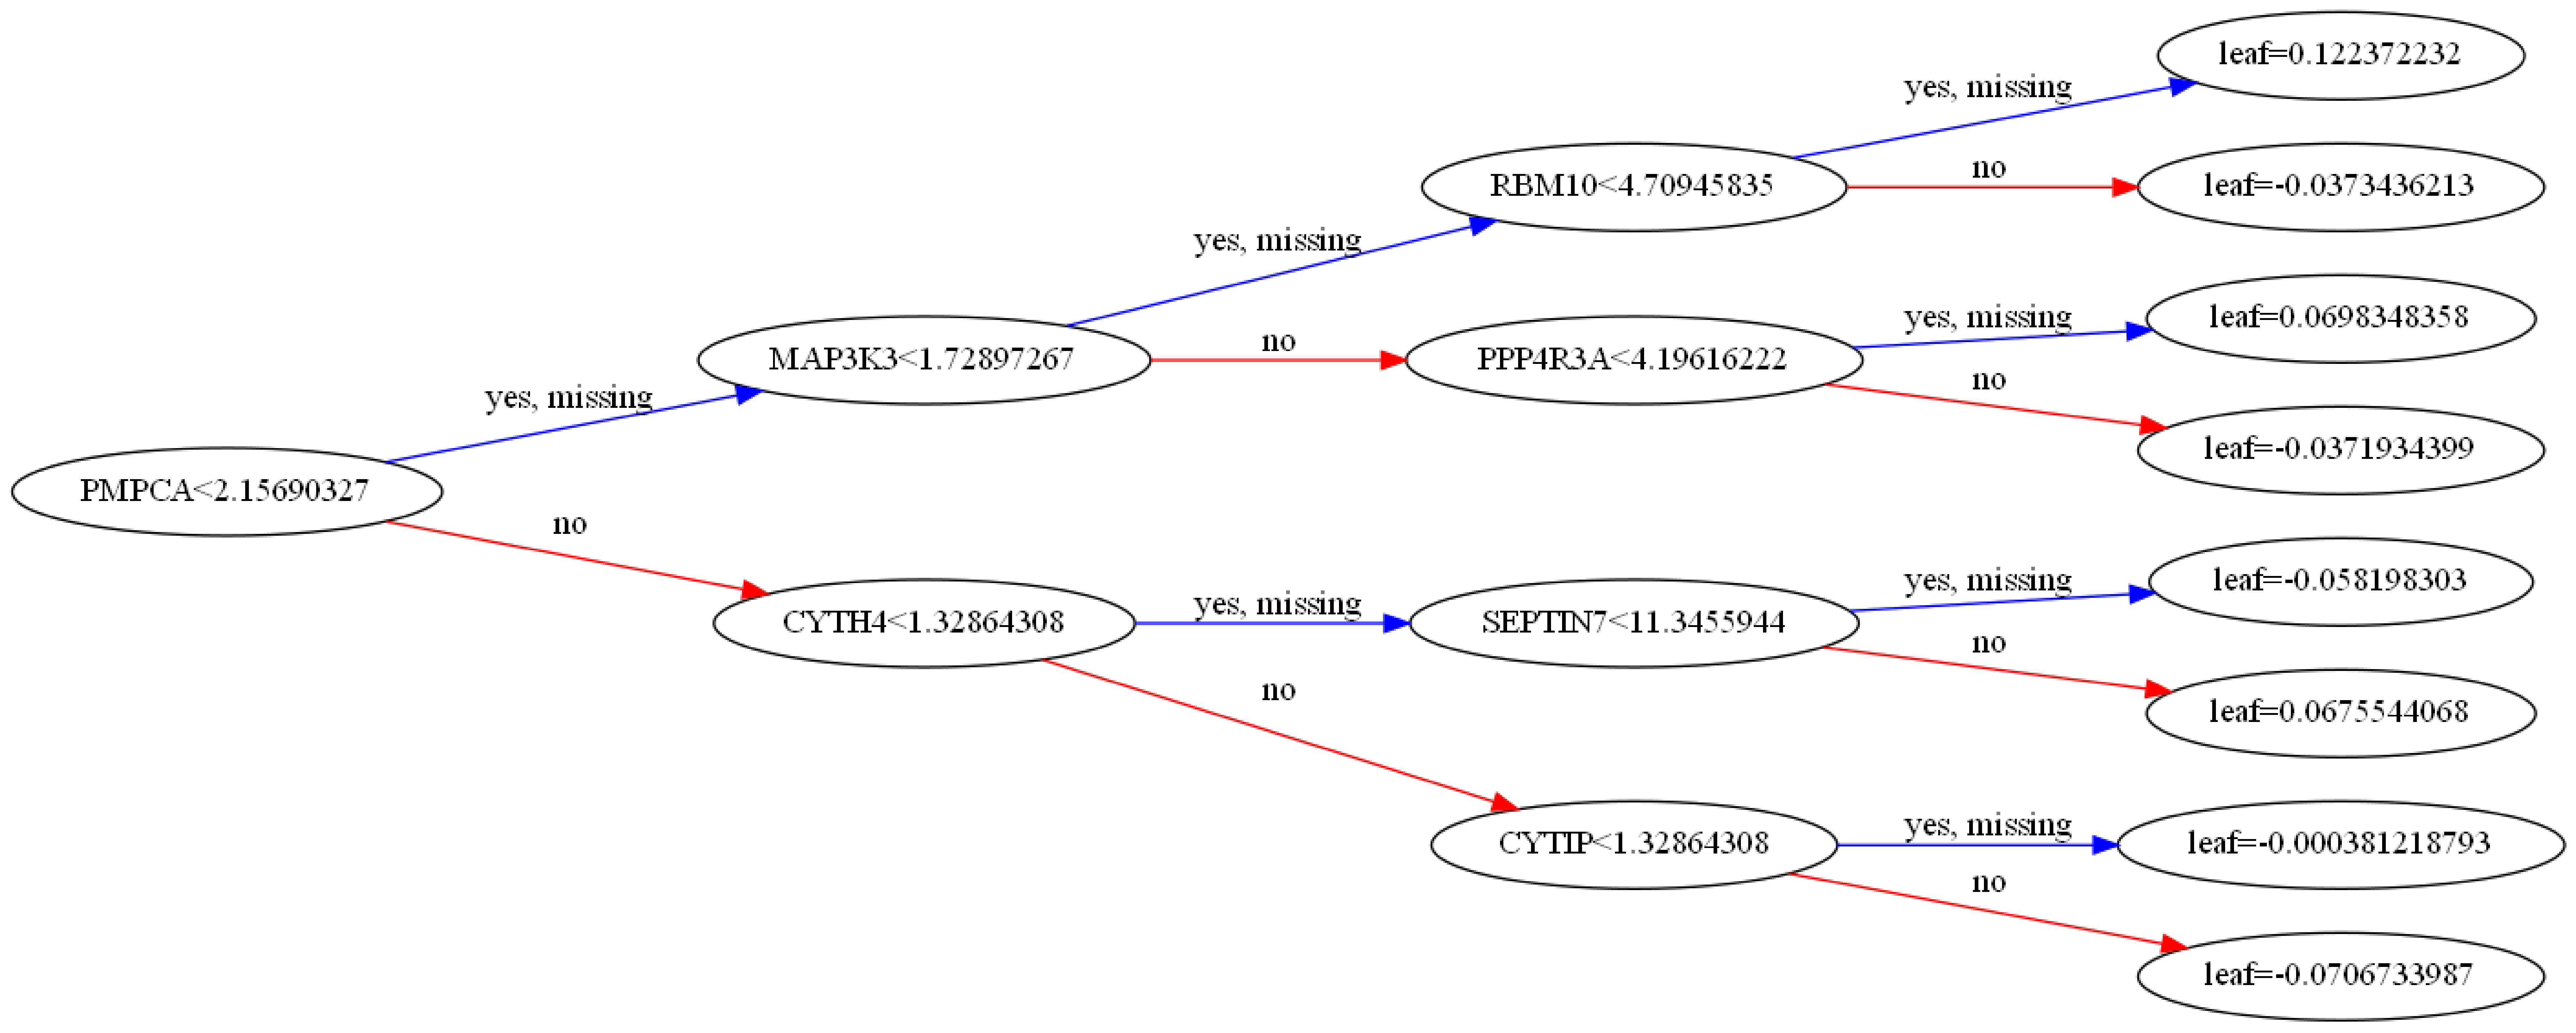

In [34]:
# cols,特征名称列表
# num_trees，选择画第几棵树
# rankdir，选择显示方向。LR为横着长，HR为竖着
cols = train_x.columns.tolist()

def ceate_feature_map(features):
    outfile = open('xgb.fmap', 'w')
    i = 0
    for feat in features:
        outfile.write('{0}\t{1}\tq\n'.format(i, feat))
        i = i + 1
    outfile.close()
ceate_feature_map(cols)

xgb.plot_tree(model_XGB, num_trees=3, fmap='xgb.fmap', rankdir='LR')
fig = plt.gcf()
fig.set_size_inches(150, 150)
plt.show()

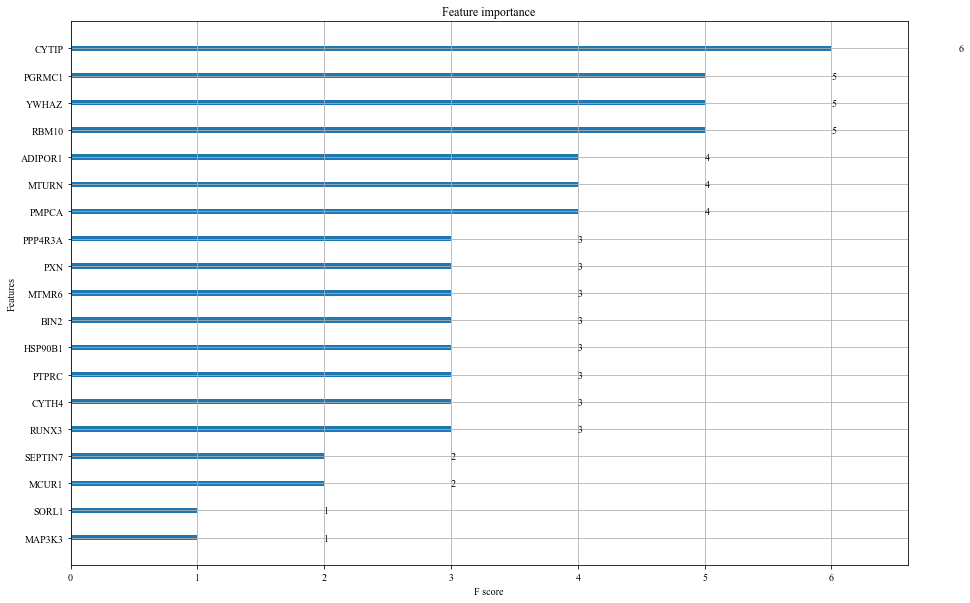

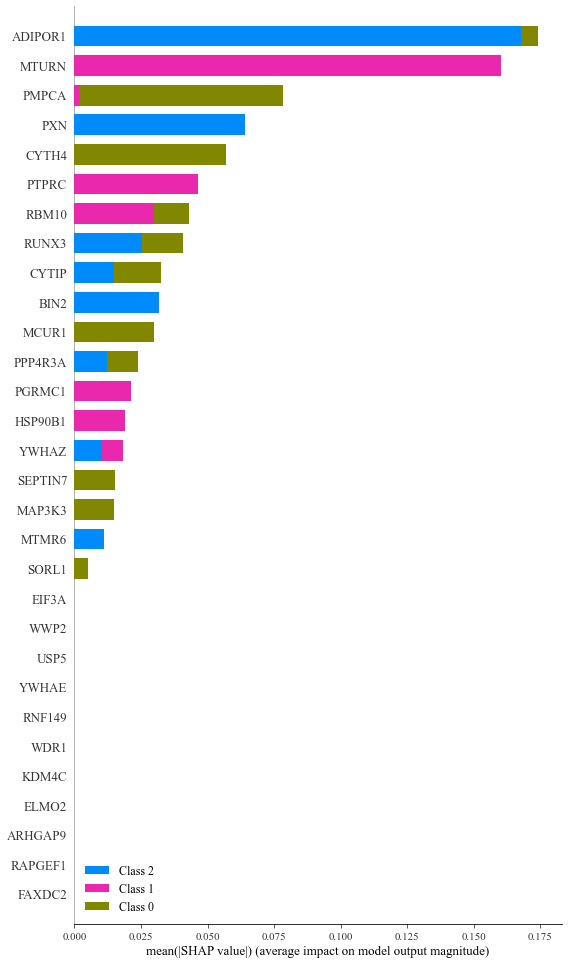

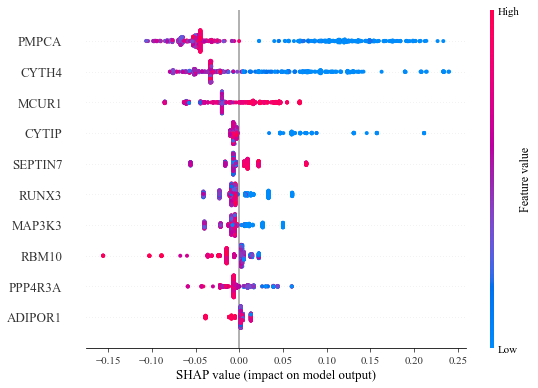

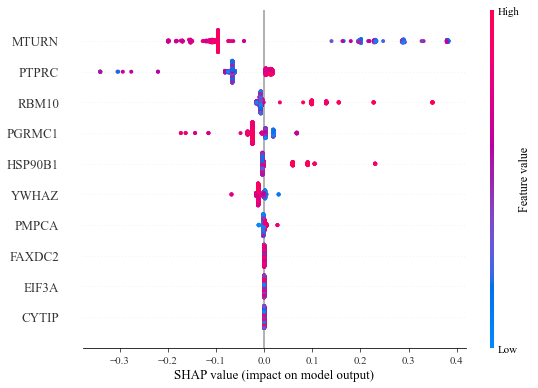

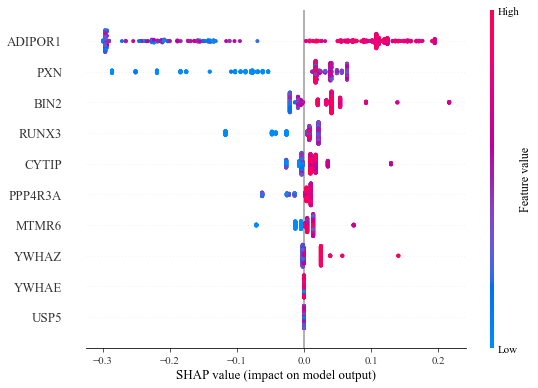

In [58]:
from matplotlib.backends.backend_pdf import PdfPages
import shap

with PdfPages('xgb多分类重要性.pdf') as pdf:

    ceate_feature_map(cols)
    xgb.plot_importance(model_XGB,  fmap='xgb.fmap')
    fig = plt.gcf()
    plt.rc('font',family='Times New Roman')
    fig.set_size_inches(15, 10)
    plt.show()
    pdf.savefig(fig)
    plt.show()
    
    train_x = pd.DataFrame(X_train_3_np, columns=union_list)
    
    fig = plt.figure()
    # SHAP计算
    explainer = shap.TreeExplainer(model_XGB)
    shap_values = explainer.shap_values(train_x)
    # 特征统计值
    shap.summary_plot(shap_values, train_x, max_display = 30)
    # 图3
    plt.show()
    pdf.savefig(fig)
    plt.show()
    
    fig = plt.figure()
    # SHAP值解释
    shap.summary_plot(shap_values[0], train_x, max_display=10)
    plt.show()
    pdf.savefig(fig)
    plt.close()
    
    fig = plt.figure()
    shap.summary_plot(shap_values[1], train_x, max_display=10)
    plt.show()
    pdf.savefig(fig)
    plt.close()
    
    fig = plt.figure()
    shap.summary_plot(shap_values[2], train_x, max_display=10)
    plt.show()
    pdf.savefig(fig)
    plt.close()

In [36]:
# 输出验证集验证概率
xg_test = xgb.DMatrix(X_test_3_np) 
y_test_prob = model_XGB.predict(xg_test).reshape(X_test_3_np.shape[0], n_components) # 给出属于每个类别的概率
y_test_label = np.argmax(y_test_prob, axis=1) #从预测的6组中选择最大的概率进行输出

In [37]:
output_testset = pd.concat([data_test, pd.DataFrame(y_test_label.reshape(-1,1))], axis=1)
output_testset.to_csv('output_test_3cluster.csv')

In [38]:
# 输出验证集验证概率
xg_validation = xgb.DMatrix(X_validation_3_np) 
y_validation_prob = model_XGB.predict(xg_validation).reshape(X_validation_3_np.shape[0], n_components) # 给出属于每个类别的概率
y_validation_label = np.argmax(y_validation_prob, axis=1) #从预测的6组中选择最大的概率进行输出

output_validationset = pd.concat([data_validation, pd.DataFrame(y_validation_label.reshape(-1,1))], axis=1)
output_validationset.to_csv('output_validation_3cluster.csv')

In [39]:
# 输出验证集验证概率
xg_train = xgb.DMatrix(X_train_3_np) 
y_train_prob = model_XGB.predict(xg_train).reshape(X_train_3_np.shape[0], n_components) # 给出属于每个类别的概率
y_train_label = np.argmax(y_train_prob, axis=1) #从预测的6组中选择最大的概率进行输出

output_trainset = pd.concat([data_train, pd.DataFrame(y_train_label.reshape(-1,1))], axis=1)
output_trainset.to_csv('output_train_3cluster.csv')

In [21]:
X_validation_3_np.shape

(651, 30)